# PLAY STORE APPLICATION ANALYSIS

## About dataset

- **App:** The name of the app
- **Category:** The category of the app
- **Rating:** The rating of the app in the Play Store
- **Reviews:** The number of reviews of the app
- **Size:** The size of the app
- **Install:** The number of installs of the app
- **Type:** The type of the app (Free/Paid)
- **Price:** The price of the app (0 if it is Free)
- **Content Rating:** The appropiate target audience of the app
- **Genres:** The genre of the app
- **Last Updated:** The date when the app was last updated
- **Current Ver:** The current version of the app
- **Android Ver:** The minimum Android version required to run the app

## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
df = pd.read_csv('googleplaystore.csv')

## Data Exploration

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Cleaning Data

In [8]:
Rating_mean = df['Rating'].mean()
df['Rating'].fillna(Rating_mean,inplace = True)

In [9]:
df['Rating'].max()

19.0

In [10]:
df.drop(index = df[df['Rating'] > 5].index,inplace = True)

In [11]:
df['Rating'].max()

5.0

In [12]:
df.drop(columns = ['Last Updated', 'Current Ver','Android Ver'],inplace = True)

In [13]:
df['Type'].fillna('Free',inplace=True)

In [14]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

## Data Analysis and Visualisation

### Get unique values by category

In [15]:
df['Category'].nunique()

33

### Plotting as scatter for Rating by Category

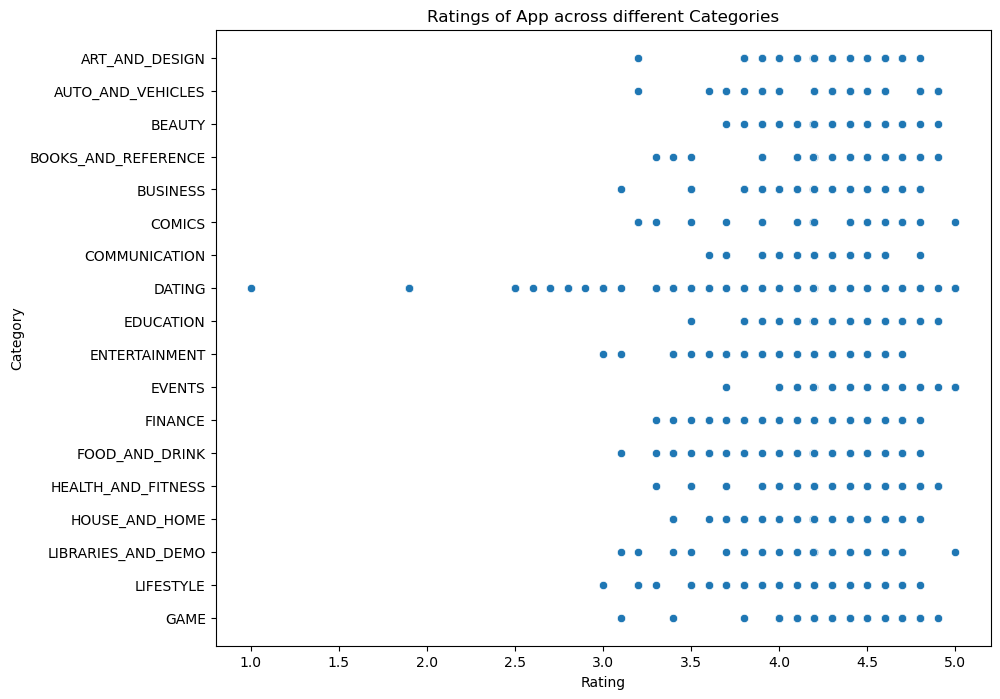

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df.head(2000), x='Rating', y='Category')
plt.title('Ratings of App across different Categories')
plt.show()

### Countplot the number of apps by Categories

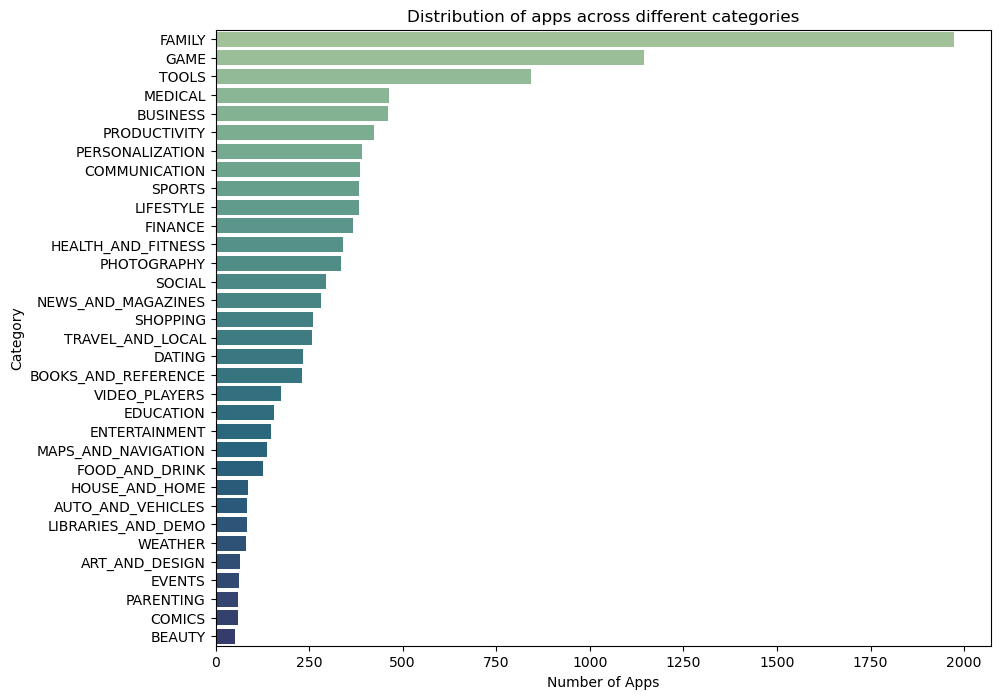

In [17]:
plt.figure(figsize=(10,8))
category = df['Category'].value_counts().index
sns.countplot(data = df, y='Category', order = category, palette='crest')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.title('Distribution of apps across different categories')
plt.show()

### Total number of free and paid apps

In [18]:
total = df['Type'].value_counts()
total

Type
Free    10040
Paid      800
Name: count, dtype: int64

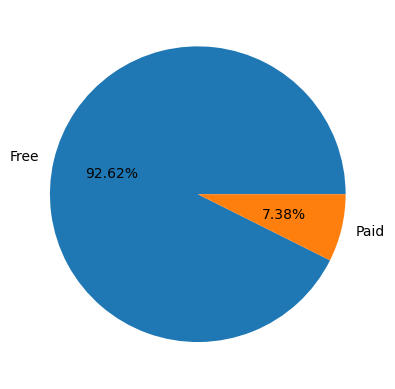

In [19]:
plt.pie(total,labels = ['Free','Paid'],autopct= "%.2f%%")
plt.show()

### Top 15 genres distribution

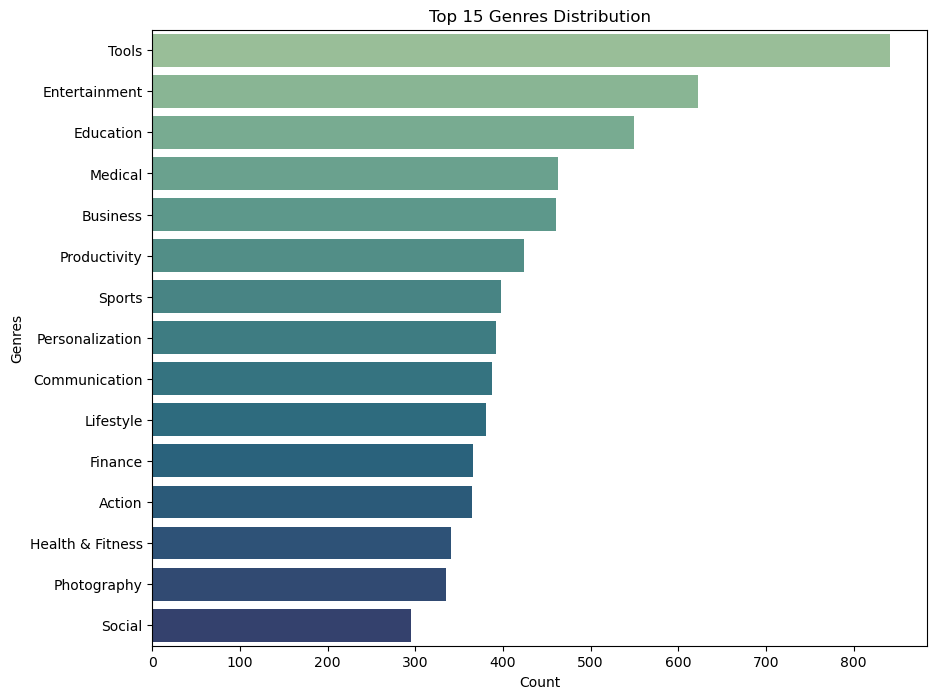

In [20]:
plt.figure(figsize=(10, 8))
genres_dist = df['Genres'].value_counts().head(15)  
sns.barplot(x=genres_dist.values, y=genres_dist.index, palette='crest')
plt.title('Top 15 Genres Distribution')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

### Average rating by category

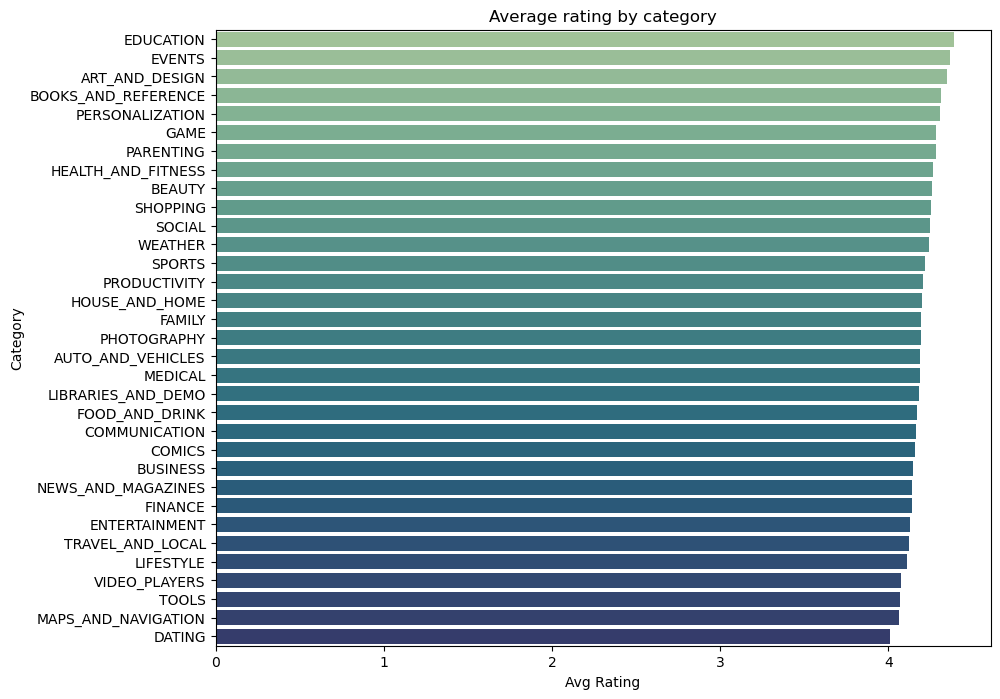

In [21]:
avg_cat_mean = df.groupby('Category')['Rating'].mean().sort_values(ascending = False)
plt.figure(figsize=(10,8))
sns.barplot(x = avg_cat_mean.values, y = avg_cat_mean.index, palette="crest")
plt.xlabel('Avg Rating')
plt.ylabel('Category')
plt.title('Average rating by category')
plt.show()

### Installs vs Rating

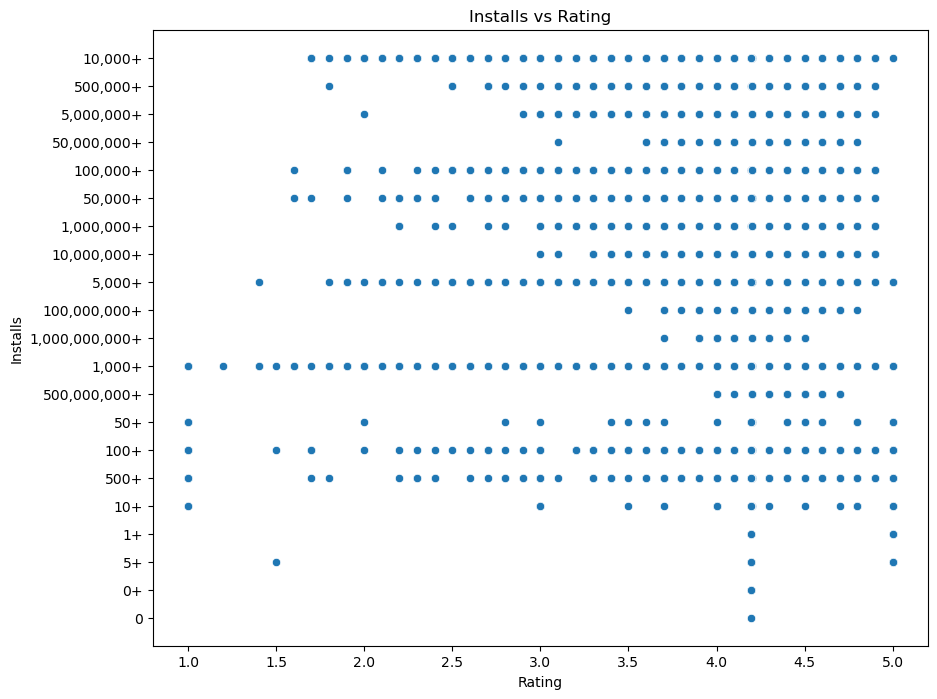

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Rating', y='Installs', data=df)
plt.title('Installs vs Rating')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.show()

### Most free Installed apps

In [24]:
# Convert installs  from object to float

df['Installs'] = df['Installs'].apply(lambda x : str(x).replace(',',''))
df['Installs'] = df['Installs'].apply(lambda x : str(x).replace('+',''))
df['Installs'] = df['Installs'].apply(lambda x : float(x))
df['Installs'].dtype

dtype('float64')

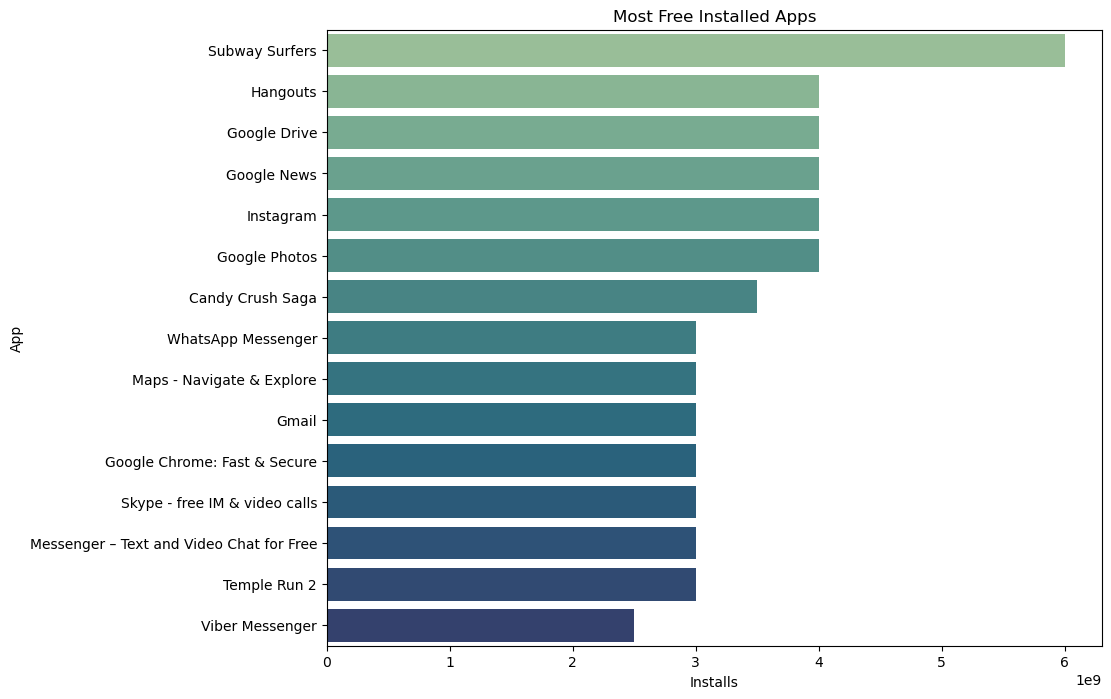

In [25]:
top_15_free_apps = df[df['Type'] == 'Free'].groupby('App')['Installs'].sum().sort_values(ascending = False).head(15)
plt.figure(figsize=(10,8))
sns.barplot(x = top_15_free_apps.values, y = top_15_free_apps.index, palette="crest")
plt.xlabel('Installs')
plt.ylabel('App')
plt.title('Most Free Installed Apps')
plt.show()

### Most paid apps

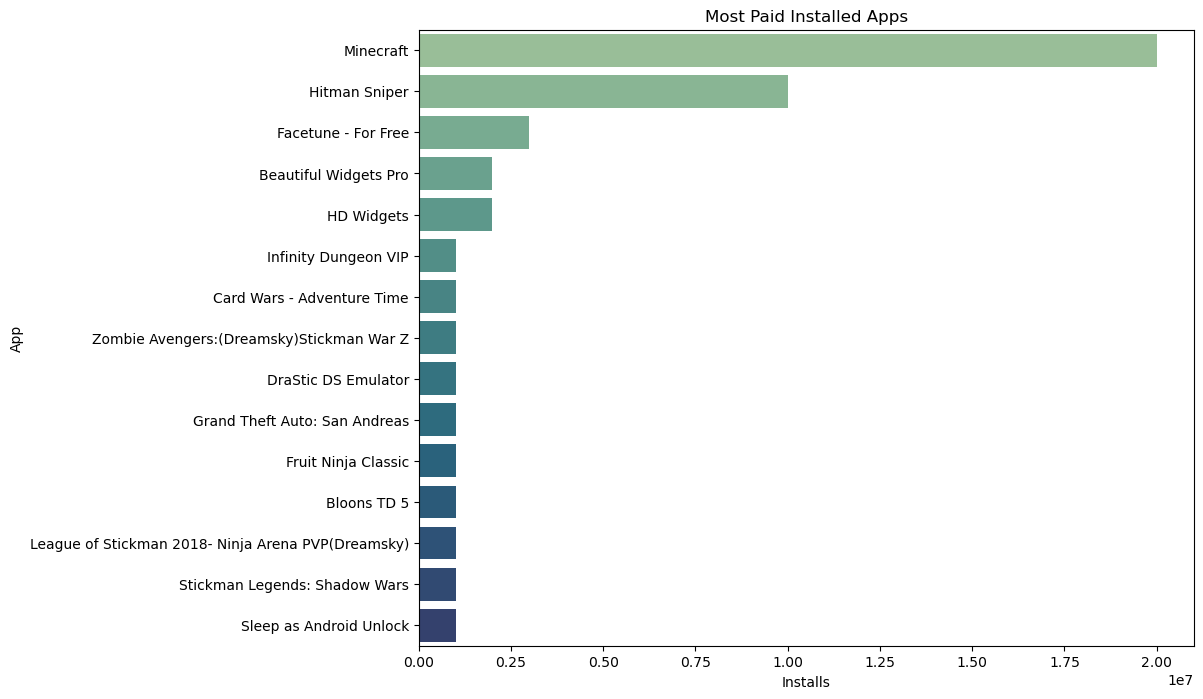

In [26]:
top_15_paid_apps = df[df['Type'] == 'Paid'].groupby('App')['Installs'].sum().sort_values(ascending = False).head(15)
plt.figure(figsize=(10,8))
sns.barplot(x = top_15_paid_apps.values, y = top_15_paid_apps.index, palette="crest")
plt.xlabel('Installs')
plt.ylabel('App')
plt.title('Most Paid Installed Apps')
plt.show()

### Most installed category

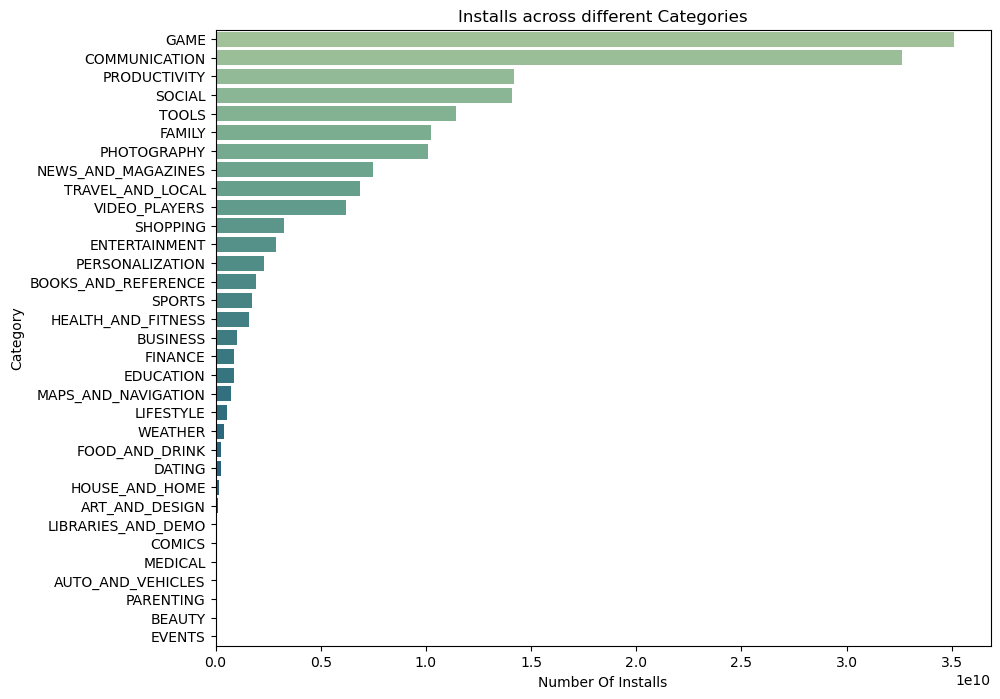

In [27]:
most_category = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x = most_category.values, y = most_category.index, palette="crest")
plt.xlabel('Number Of Installs')
plt.ylabel('Category')
plt.title('Installs across different Categories')
plt.show()

### Count of Content Rating

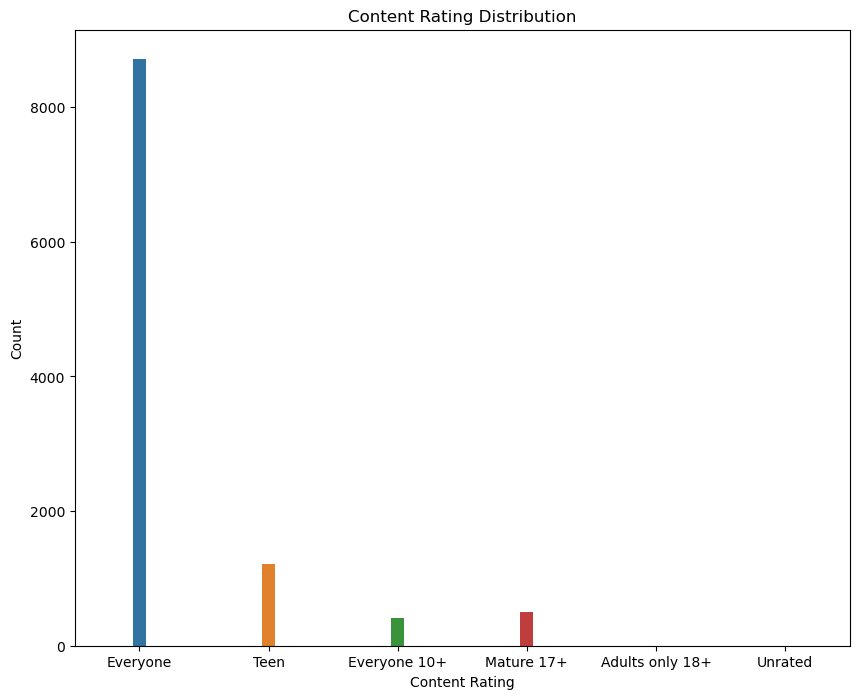

In [28]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Content Rating',width=0.1,data=df)
plt.title('Content Rating Distribution')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()